# پروژه صفر

##### vectorization پروژه صفر آشنایی با  
هدف پروژه: پرکردن نواقص یک دیتاست با پیش بینی آنها با تحلیل آماری


.فایل اطلاعاتی موجود که حاوی اطلاعات مربوط به ۱۰۰۰ کاربر یک سایت است که با یک آگهی اینترنتی برخورد کرده اند. در هر سطر فایل یک رکورد با اطلاعات زیر آمده است<br>
زمان سپری شده در سایت
<br>
سن<br>
میانگین درآمد منطقه کاربر<br>
میزان استفاده روزانه از اینترنت<br>
موضوع آگهی<br>
شهر<br> 
جنسیت<br>
کشور<br>
زمانی که رکورد ثبت شده<br>
آیا روی آگهی کلیلک کرده یا خیر<br>
.برای تعدادی از نمونه ها مقدار ستون هدف (آیا روی آگهی کلیلک کرده یا خیر) مشخص نیست و هدف پروژه پیش بینی این مقدار با استفاده از سایر ویژگی هاست

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import norm

گام اول پروژه خواندن داده های موجود در فایل و نشان داده ۵ داده اول و آخر و همچنین توضیحات مربوط به هر ویژگی است

In [3]:
data = pd.read_csv("advertising_dataset.csv")
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


In [4]:
data.tail()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


است که در واقع همان شناسه هر رکورد میباشد unnamed با مشاهده داده ها اولین نکته ویژگی 

In [5]:
data.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,499.500000,64.794818,36.009193,55000.000080,179.751271,0.496394
std,288.819436,15.954841,8.783636,13414.634022,43.957934,0.500288
min,0.000000,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,249.750000,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,499.500000,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,749.250000,78.555000,42.000000,65470.635000,217.850000,1.000000
max,999.000000,91.430000,61.000000,79484.800000,269.960000,1.000000


جدول بالا اطلاعات آماری مربوط به هر ویژگی را نشان میدهد با مشاهده اعداد سطر اول که تعداد عناصر پرشده در جدول را نشان میدهد متوجه میشویم که برای بیشتر ویژگی ها تعدادی از رکورد ها خالی هستند و در کلاس هدف تقربا ۲۰۰ عنصر مقدار ندارند.<br>
کاربران این وبسایت به طور میانگین ۳۶ سال سن دارند که کوچکترین آنها ۱۹ سال و بزرگترین ۶۱ سال سن دارد.<br>
ویژگی بعدی میزان زمانی است که هر کاربر در این وبسایت وقت میگذارد(احتمالا این ویژگی به دقیقه نشان داده شده چون ثانیه و ساعت با توجه به مقادیر کمترین و بیشترین منطقی نیستند) کاربران به طور میانگین بیش از یک ساعت در این سایت وقت میگذرانند که نصف این داده ها کمتر از یک ساعت با مینیمم ۳۰ دقیقه وقت صرف میکنند در حالی که مابقی بیش از این مقدار در این سایت هستند.<br>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  907 non-null    float64
 2   Age                       979 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      913 non-null    float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Gender                    1000 non-null   object 
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             832 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


همان طور که اشاره کردم و درجدول بالا عم مشهود است ۸۳۲ داده از کلاس هدف مقدار دارند و مابقی ندارند ویژگی های زمان در سایت،سن و مصرف اینترنت روزانه به ترتیب ۹۰۷ ، ۹۷۹ و ۹۱۳ رکورد غیر نال دارند.<br>
ویژگی های عددی از جنس اعشاری و ویژگی های دسته ای از جنس شی هستند

گام دوم در این پروژه جایگذاری جنسیت افراد با مقادیر صفر و یک است.برای برچسب گذاری ابتدا باید نوع ستون به کتگوری تبدیل شود سپس از دستور زیر استفاده میکنیم.  

In [7]:
data['Gender'] = data['Gender'].astype('category').cat.codes
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


گام سوم جایگذاری سلول های خالی با مقدار میانگین آنهاست البته به جز کلاس هدف<br>
به این منظور ابتدا تعداد عناصر خالی هر ستون را پیدا میکنیم

In [8]:
data.isna().sum()

Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

سپس برای آنکه عناصرخالی کلاس هدف جلیگذاری نشوند آنها را در متغیر دیگری ذخیره و داده هایی را که این ستون را از آن حذف کرده ایم در متغییر دیگری میریزیم

In [9]:
goal = data['Clicked on Ad']
attr = data.drop(['Clicked on Ad'] , axis =1)
attr2 = attr

روش اول برای جایگذاری هر عنصر خالی با میانگین عناصر دیگر همان ستون استفاده از کتابخانه پانداس میباشد

In [10]:
tic = time.time()
attr = attr.fillna(attr.mean())
toc = time.time()
print((toc-tic)*1000)


31.980037689208984


و روش دوم با استفاده از کتابخانه نامپای است

In [11]:
tic = time.time()
attr2.replace(np.nan, attr2.mean())
toc = time.time()
print((toc-tic)*1000)


119.92454528808594


در آخر و پس از جایگداری داده ها باید دوباره کلاس هدف را در کنار مابقی ستون ها قرار داده و در متغییر داده بریزیم

In [12]:

data = pd.concat([attr , goal],axis=1)
data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.950000,35.0,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.230000,31.0,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.470000,26.0,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.150000,29.0,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.370000,35.0,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.970000,30.0,71384.57,208.580000,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.300000,45.0,67782.17,134.420000,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.630000,51.0,42415.72,120.370000,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.550000,19.0,41920.79,187.950000,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0.0


برای آنکه نشان دهیم چه تعداد از کاربران زن یا مرد هستند یا آنکه چه تعداد از کاربران روی آگهی کلیک کرده اند میتوانیم داده های هرستون را گرفته و تعداد ارزش های هر دسته را نشان دهیم مثلا جنسیت دو دسته زن ومرد در این مجموعه دارد و دستور زیر تعداد مردان و زنان موجود در مجموعه را نشان میدهد.

In [13]:
data['Gender'].value_counts()

0    519
1    481
Name: Gender, dtype: int64

In [14]:
data['Clicked on Ad'].value_counts()

0.0    419
1.0    413
Name: Clicked on Ad, dtype: int64

اما به منظور دسته بندی داده ها و شمارش آنها با بیش از دو معیلر میتوانیم از گروهبندی داده ها استفاده کنیم 

In [15]:
data.groupby(['Gender','Age']).size()

Gender  Age 
0       19.0    2
        20.0    1
        21.0    2
        22.0    9
        23.0    9
               ..
1       55.0    3
        57.0    4
        59.0    1
        60.0    2
        61.0    1
Length: 85, dtype: int64

و برای آنکه روی داده ها شرط بگذاریم و مثل شکل زیر ابتدا شروط را برقرار و سپس نتایج را به مجموعه داده میدهیم و سپس تعداد عناصر را برمیگردانیم.

In [16]:
len(data[(data['Age']> 22) & (data['Gender'] == 0)])


505

مزیت دیگر دستور گروهبندی این است که میتوان روی آن توبع مختلف برای شمار، میانگین یا انحراف معیار را اعمال کرد

در این مرحله با دوروش استفاده از حلقه و بدون حلقه میانگین سن افرادی را که کلیک کرده و نکرده اند را به دست می آوریم. انتظار میرود اجرای این دستور با حلقه به شدت کندتر باشد

In [17]:
tic = time.time()
data.groupby(['Clicked on Ad'])['Age'].mean()
toc = time.time()
print((toc-tic)*1000)

7.9975128173828125


In [18]:
tic = time.time()
yes = no =0
yes_num = no_num =0
for index,row in data.iterrows():
    if row['Clicked on Ad']==0.0:
        no += row['Age']
        no_num +=1
    elif row['Clicked on Ad']==1.0:
        yes += row ['Age']
        yes_num +=1

toc = time.time()
print((toc-tic)*1000)

159.9254608154297


همان طور که انتظار میرفت تفاوت فاحشی در زمان اجرای دو روش فوق وجود دارد

 شکل توزیع هر ستون از داده ها نشان داده شده است histبا استفاده از تابع 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016EFA1365C8>,
      dtype=object)

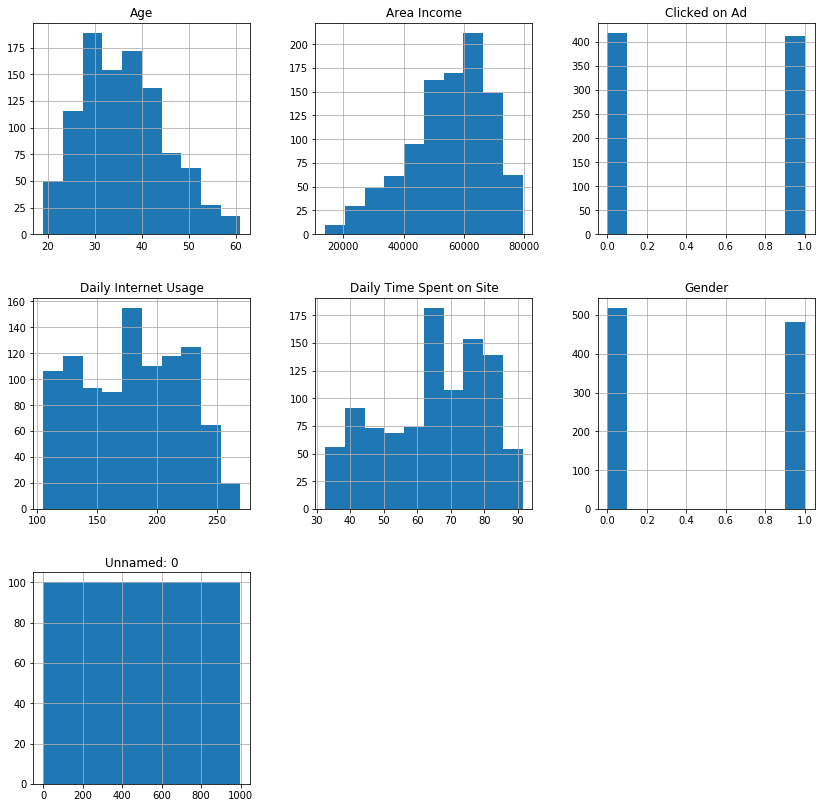

In [19]:
data.hist(figsize=(14,14), bins=10)

از آنجا که در این گام میخواهیم دوباره روی داده ها به جز ستون هدف تغییر ایجاد کنیم مثل قبل این ستون را جدا کرده و سپس تغییرات دلخواه را اعمال میکنیم.<br>
در این مرحله داده ها را نرمال میکنیم یعنی تمام داده ها در یک بازه مشخص می آوریم تا امکان مقایسه بهتر را فراهم کنیم برای اینکار میانگین را از داده ها کم کرده و تقسیم بر انحراف معیار میکنیم

In [20]:
obj = data.select_dtypes(include='object')
data = data.select_dtypes(exclude='object')
goal = data['Clicked on Ad']
attr = data.drop(['Clicked on Ad'] , axis =1)

In [21]:
attr = (attr-attr.mean())/attr.std()
data = pd.concat([attr , goal],axis=1)

نتایج را دوباره نشان میدهیم و میبینیم تمام ستون ها در محدوده نزدیک به صفر هستند و مرکز آنها صفر میباشد.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016EFAC6EB88>,
      dtype=object)

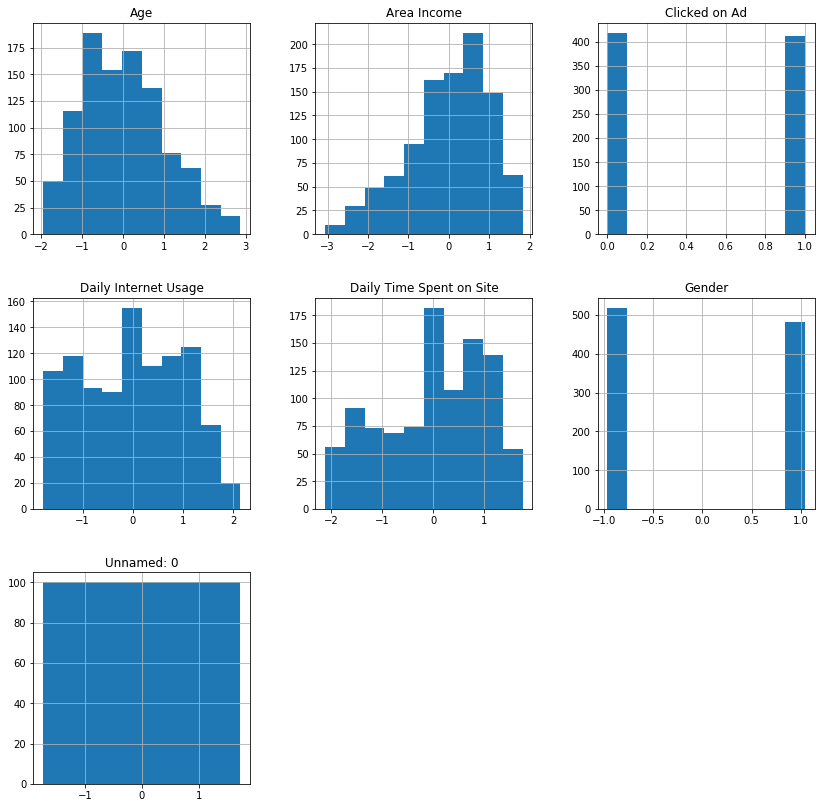

In [22]:
data.hist(figsize=(14,14), bins=10)

برای نمایش تابع چگالی احتمال هر ستون ابتدا میانگین و انحراف معیار آن ستون را نیاز داریم<br>
ابتدا داده ها در دو دسته کلیک کرده و نکرده جدا میکنیم تا هنگام رسم نمودار آنها دو دسته جداگانه داشته باشیم سپس برای هر دسته میانگین و انحراف معیار تمام ستون ها را به دست می آوریم و دیتافریم جدید را در متغییر مربوطه میریزیم.

In [23]:
clicked = data[data['Clicked on Ad']==1]
notClicked = data[data['Clicked on Ad']==0]
clicked_mean = clicked.groupby(['Clicked on Ad']).mean()
clicked_std = clicked.groupby(['Clicked on Ad']).std()
notClicked_mean = notClicked.groupby(['Clicked on Ad']).mean()
notClicked_std = notClicked.groupby(['Clicked on Ad']).std()


برای رسم تابع چگالی احتمال تابع جدیدی را تعریف کردم تا برای هر ستون تنها این تابع فراخوانی شود . در این تابع ابتدا نرم با استفاده از میانگین و انحراف معیار محاسبه و سپس تابع برای هر دسته جداگانه اما در یک نمودار رسم میشود.<br>
رنگ قرمر مربوط به کاربرانی است که روی آگهی کلیک نکرده اند و رنگ آبی کاربرانی هستند که کلیلک کرده اند.

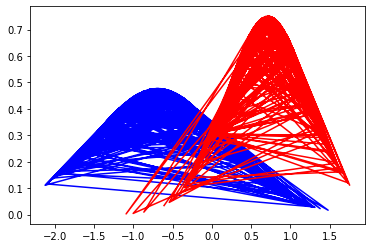

In [24]:
def plot_pdf(column):
    clicked_pdf = norm.pdf(clicked[column],clicked_mean[column],clicked_std[column])
    notClicked_pdf = norm.pdf(notClicked[column],notClicked_mean[column],notClicked_std[column])
    plt.plot(clicked[column], clicked_pdf, label='clicked',color='blue')
    plt.plot(notClicked[column], notClicked_pdf, label='notClicked', color='red')
    
    
plot_pdf('Daily Time Spent on Site')    

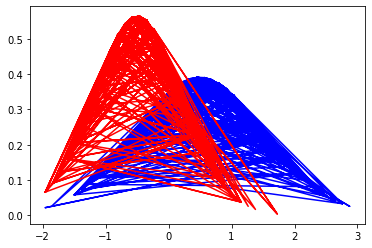

In [25]:
plot_pdf('Age')    

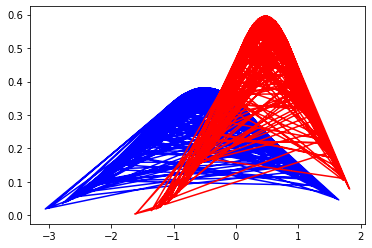

In [26]:
plot_pdf('Area Income')    

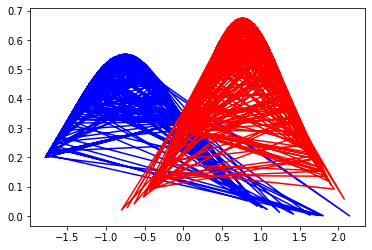

In [27]:
plot_pdf('Daily Internet Usage')    

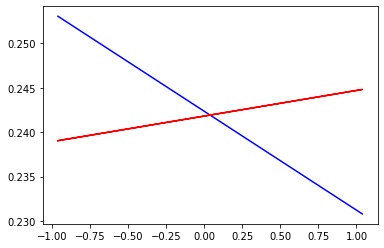

In [28]:
plot_pdf('Gender')   

با مشاهده نمودارهای فوق میبینیم که تمام آنها با یکدیگر همپوشانی دارند اگر ستونی بود که این داده ها در آن ستون با یکدیگر همپوشانی نداشتند آن ستون بهترین برای پیش بینی کلیک یا عدم کلیک کاربر روی آگهی میشد چرا که در آن صورت هر نقطه برای یکی از حالت ها احتمال صفر و برای دیگری بیش از صفر را میداشت اما اگر دو تابع دقیقا روی هم باشند هر نقطه   احتما برابر برای هر دو حالت دارد و نمیتوان هیچ کدام را انتخاب کرد. پس از بین تمام ویژگی های رسم شده زمان مصرف شده در سایت دقت بهتری را در مقایسه با بقیه خواهد داشت 

در آخر با توجه به مقدار زمان مصرف شده در سایت برای هر ردیفی که مقدار کلیلک شدن مشخص نیست مقدار صفر یا یک را قرار میدهیم 

In [29]:
for index,row in data.iterrows():
    if (row['Clicked on Ad'] !=1)and (row['Clicked on Ad'] !=0):
        if row['Daily Time Spent on Site']>0:
            data.loc[index, 'Clicked on Ad'] = 1
        else:
            data.loc[index, 'Clicked on Ad'] = 0


In [30]:
data.to_csv('result.csv')

In [31]:
!jupyter nbconvert AI_CA.ipynb --to html

[NbConvertApp] Converting notebook AI_CA.ipynb to html
[NbConvertApp] Writing 587859 bytes to AI_CA.html
